# Structure probing method comparison

Here we compare the results of four studies that reported full-length SARS-CoV-2 secondary structures based on in-cell structure probing data.

In short, cells infected with SARS-CoV-2 were probed with a structure probing reagent. Then, sites of chemical adducts were encoded in cDNA libaries and sequenced. Chemical reactivity is estimated using a bioinformatic pipeline. Structure prediction is performed using chemical reactivity as restraints.

All four studies differed in the details of each of these steps. Refer to table 1 for the differences between these experiments.

For each publication, per-nucleotide reactivities and secondary structure models were downloaded from the original publications with one exception. The full-length structure model from Sun et al. was not attached in the original publication, but was found in the supplemental data from Lan et al.

Manfredonia et al. 2020 [link](https://doi.org/10.1093/nar/gkaa1053)

- Data set website [link](http://www.incarnatolab.com/datasets/SARS_Manfredonia_2020.php)
- Reactivity data [link](http://www.incarnatolab.com/downloads/datasets/SARS_Manfredonia_2020/XML.tar.gz)
- Structure model [link](http://www.incarnatolab.com/downloads/datasets/SARS_Manfredonia_2020/Structure_models.tar.gz)

Sun et al. 2021 [link](https://doi.org/10.1016/j.cell.2021.02.008)

- Reactivity data [link](https://www.cell.com/cms/10.1016/j.cell.2021.02.008/attachment/62b49a27-68e7-44bc-ab12-2a0fc9705938/mmc2.xlsx)

Lan et al. 2022 [link](https://doi.org/10.1038/s41467-022-28603-2)

- Structure model [link](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-28603-2/MediaObjects/41467_2022_28603_MOESM10_ESM.txt)
- Reactivity data [link](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-28603-2/MediaObjects/41467_2022_28603_MOESM9_ESM.xlsx)
- Supplemental data file containing Sun et al. structure model [link](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-28603-2/MediaObjects/41467_2022_28603_MOESM13_ESM.xlsx)

Huston et al. 2021 [link](https://doi.org/10.1016/j.molcel.2020.12.041)

- Github repo [link](https://github.com/pylelab/SARS-CoV-2_SHAPE_MaP_structure/tree/11ab13d34fc19e2b8892b06e5efdefad790d38ad)
- Reactivity data [link](https://github.com/pylelab/SARS-CoV-2_SHAPE_MaP_structure/blob/11ab13d34fc19e2b8892b06e5efdefad790d38ad/SHAPE-MaP_data/SARS-CoV-2_SHAPE_Reactivity.txt)
- Structure model [link](https://github.com/pylelab/SARS-CoV-2_SHAPE_MaP_structure/blob/11ab13d34fc19e2b8892b06e5efdefad790d38ad/SHAPE-MaP_data/SARS-CoV-2_Full_Length_Secondary_Structure_Map.ct)


## Import RNAvigate

The first step in this notebook is to import the necessary Python modules: RNAvigate and Pandas. Pandas is needed to load Excel files into RNAvigate.

In [1]:
import rnavigate as rnav
import pandas as pd


## Define samples and provide input file names

Next, data files are loaded into RNAvigate samples, and assigned data keywords.

- `shapemap` stores SHAPE-MaP, icSHAPE, or DMS-MaPseq data depending on the study.
- `ss` stores the secondary structure model from each study.

RNAvigate does not natively accept Excel files. Instead, Pandas is used to create DataFrames, which are accepted, from the Excel files. This requires only one extra python function.

In [2]:
huston = rnav.Sample(
    sample="Huston et al.",
    shapemap="./Huston_etal_2021/SARS-CoV-2_SHAPE_Reactivity.map",
    ss="./Huston_etal_2021/SARS-CoV-2_Full_Length_Secondary_Structure_Map.ct")

manfredonia = rnav.Sample(
     sample="Manfredonia et al.",
     shapemap={
         "shapemap_rnaframework": "./Manfredonia_etal_2020/SHAPE_invivo/SHAPE_invivo.xml"
         },
     ss="./Manfredonia_etal_2020/SHAPE_invivo/SARS-CoV-2.db")

manfredonia_vitro_DMS = rnav.Sample(
     sample="Manfredonia et al. (DMS)",
     shapemap={
         "shapemap_rnaframework": "./Manfredonia_etal_2020/DMS_invitro/DMS_invitro.xml",
          },
     ss="./Manfredonia_etal_2020/DMS_invitro/SARS-CoV-2.db")

lan_profile_df = pd.read_excel(
    io="./Lan_etal_2022/population_reactivities.xlsx",
    sheet_name="mus",
    usecols=[0, 1, 3],
    names=["Nucleotide", "Sequence", "Norm_profile"])

lan = rnav.Sample(
    sample="Lan et al.",
    shapemap=lan_profile_df,
    ss="./Lan_etal_2022/vero.ct")

sun_profile_df = pd.read_excel(
    io="./Sun_etal_2021/mmc2.xlsx",
    sheet_name="SARS2-invivo",
    usecols=[0, 1, 2],
    names=["Nucleotide", "Sequence", "Norm_profile"],
    dtype={
        "Nucleotide": "Int32",
        "Sequence": "string",
        "Norm_profile": "float32"}
    )

sun_ss_df = pd.read_excel(
    io="./Lan_etal_2022/all_figure_data.xlsx",
    sheet_name="Figure S5",
    usecols=[0, 13],
    names=["Nucleotide", "Pair"],
    nrows=21289,
    skiprows=5,
    dtype={
        "Nucleotide": "Int32",
        "Pair": "Int32"})

pairs_list = [(nt, pair_nt) for _, (nt, pair_nt) in sun_ss_df.iterrows()]

sun = rnav.Sample(
    sample="Sun et al.",
    shapemap=sun_profile_df,
    ss={'ss_pairs': pairs_list, 'sequence': 'shapemap'}
    )


## Organize samples into groups

In [3]:
dms_samples = [
    lan,
    manfredonia_vitro_DMS,
    ]
shape_samples = [
    huston,
    manfredonia,
    sun,
    ]
samples = [
    lan,
    manfredonia_vitro_DMS,
    huston,
    manfredonia,
    sun,
    ]


## Making some changes to the data

Some of the loaded file formats specify DNA alphabet sequences and may contain lowercase letters. Here, all associated sequences are converted to an uppercase RNA alphabet.

Lan et al. profile data were provided as raw mutation rates. Here, DMS data are renormalized with a standard mutation rate correction for DMS-MaP data.

In [4]:
# Make sure that all sequences are RNA alphabet and uppercase
for sample in samples:
    for data_keyword in ['shapemap', 'ss']:
        sample.get_data(data_keyword).normalize_sequence(
            t_or_u='U',
            uppercase=True,
            )

# Perform DMS normalization for DMS samples
for sample in dms_samples:
    sample.get_data('shapemap').normalize(
        norm_method='percentiles',
        nt_groups=['A','C']
        )


## Check sequence alignments

We don't know what base sequences are being used, and if they differ positionally from each other.
RNAvigate's SequenceChecker analysis can be used to display this information.
In this first step, SequenceChecker is used to write a fasta file for input into ClustalOmega ([link](https://www.ebi.ac.uk/Tools/msa/clustalo/)) to obtain a multiple sequence alignment.

In [5]:

seq_check = rnav.analysis.SequenceChecker(samples=samples)
seq_check.write_fasta('sequences.fa')
help(rnav.analysis.SequenceChecker.write_fasta)


Help on function write_fasta in module rnavigate.analysis.check_sequence:

write_fasta(self, filename, which='all')
    Write all unique sequences to a fasta file.
    
    This is very useful for using external multiple sequence aligners such
    as ClustalOmega.
        1) go to https://www.ebi.ac.uk/Tools/msa/clustalo/
        2) upload new fasta file
        3) under STEP 2 output format, select Pearson/FASTA
        4) click 'Submit'
        5) wait for your alignment to finish
        6) download the alignment fasta file
        7) use rnav.data.set_multiple_sequence_alignment()
    
    Required arguments:
        filename (string)
            path to a new file to which fasta entries are written
    
    Optional arguments:
        which (list of integers)
            Sequence IDs to write to file.



## Check sequence alignments (continued)

In this next step, the sequence alignment file from the previous step is loaded into RNAvigate using `rnav.data.set_multiple_sequence_alignment`.
Whenever data is compared between these samples, they are first positionally aligned using this alignment.
RNAvigate can perform it's own pairwise alignment, but it is computationally expensive for this 29 kb RNA sequence.

Then, the SequenceChecker analysis created in the previous step can display all samples and data keywords and which sequences they contain, as well as the multiple sequence alignment.


In [6]:
base_seq = rnav.data.set_multiple_sequence_alignment('alignments.fa', set_pairwise=True)
seq_check.print_which_sequences()
seq_check.print_mulitple_sequence_alignment(base_seq)


Sequence IDs
    Lan et al.
        ss         0
        shapemap   0
    Manfredonia et al. (DMS)
        ss         1
        shapemap   1
    Huston et al.
        ss         2
        shapemap   2
    Manfredonia et al.
        ss         3
        shapemap   1
    Sun et al.
        ss         2
        shapemap   2

Multiple sequence alignment
    ID    length   alignment
    0     29882    AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGG

## Check sequence alignments (continued)

Huston et al. and Sun et al. used the same reference sequence, but otherwise the studies differ in the reference sequence used.
Curiously, the structure model from SHAPE data from Manfredonia et al. differs from the rest of their sequences.
The SequenceChecker can be used again to show these differences by inputting the sequence IDs (1 and 3).
They only differ by two nucleotides.

In [7]:
seq_check.print_alignments(print_format="long", which=(1, 3))


Sequence 1 -> 3 (29903 nts -> 29903 nts)
    mismatch       5 A --> G
    mismatch       8 G --> C



## Compare normalized reactivities between experiments

In order to determine the extent of agreement between experimental reactivities,
RNAvigate is used to plot sample vs. sample reactivies and to compute Pearson
coefficients. Here, a kernel density estimate is used, instead of the default
scatter plot, which allows better visualization for large data sets.

We directly compared Lan et al. to Manfredonia et al. DMS-MaPseq data sets and
Huston et al. to Manfredonia et al. SHAPE-MaP data sets. DMS-MaPseq
experiments differed on more parameters, yet agree relatively well. SHAPE-MaP
differed mainly in the use of the encoding RT enzyme, but do not agree well.

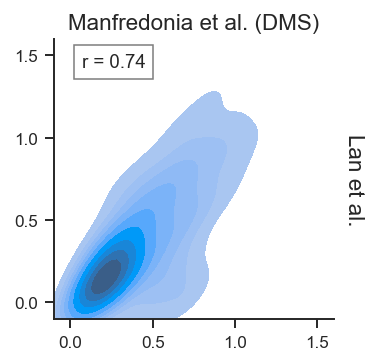

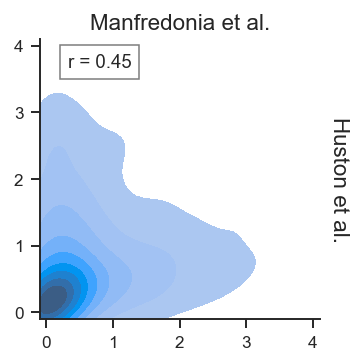

In [8]:
plot = rnav.plot_linreg(
    samples=dms_samples,
    profile="shapemap",
    scale='linear',
    region=[400, 2000],
    kde=True,
    colorbars=False,
    )
plot.axes[0, 0].set(
    xlim=(-0.1, 1.6),
    ylim=(-0.1, 1.6),
    xticks=[0, 0.5, 1.0, 1.5],
    yticks=[0, 0.5, 1.0, 1.5],
    )
plot2 = rnav.plot_linreg(
    samples=shape_samples[:2],
    profile="shapemap",
    scale='linear',
    region=[400, 2000],
    kde=True,
    colorbars=False,
    )
plot2.axes[0, 0].set(
    xlim=(-0.1, 4.1),
    ylim=(-0.1, 4.1),
    xticks=[0, 1.0, 2, 3, 4],
    yticks=[0, 1.0, 2, 3, 4],
    );

# plot.save("dms_regression.svg")
# plot2.save("shape_regression.svg")


# Inspect SHAPE-MaP reactivity distributions by nucleotide

The shape of the relationship between SHAPE-MaP reactivities suggests a bipartite relationship with two slopes.
This is sometimes seen in DMS-MaP data where nucleotide-bias is high. To inspect for nucleotide bias,
we visualized reactivity distributions for each nucleotide using `rnav.plot_ntdist()`.

The data show a strong bias in the Huston et al. reactivities. "A"s are lower than expected and "U"s slightly higher.
Manfredonia et al. reactivities fall within the expected range.
One possibility is that the reverse transcriptase used by Huston et al. (Marathon RT) encodes adducts with different efficiencies at each nucleotide.
If this is the case, and reactivities are used in structure modelling, the folding algorithm may bias towards base-paired "A"s and unpaired "U"s.



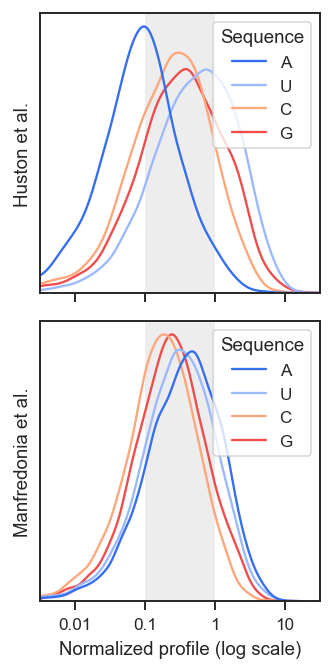

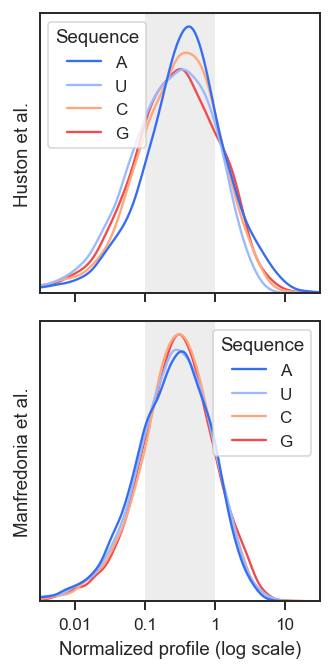

In [9]:
plot = rnav.plot_ntdist(
    samples=[huston, manfredonia],
    profile="shapemap",
)

norm_samples = [rnav.Sample(s.sample, inherit=s) for s in [huston, manfredonia]]
for sample in norm_samples:
    shapemap = sample.get_data("shapemap").copy()
    shapemap.normalize(norm_method="boxplot", nt_groups=["A", "U", "C", "G"])
    sample.data["shapemap"] = shapemap

plot2 = rnav.plot_ntdist(
    samples=norm_samples,
    profile="shapemap"
)

# plot.save("nt_distribution.svg")
# plot2.save("nt_distribution_norm.svg")


## Compare structure models

These 4 studies ultimately resulted in 4 different structure models, all based on in-cell structure probing experiments which differed at every experimental and computational step.
For each structure we compute the percentage of base pairs predicted by 1, 2, 3 or 4 studies.
Overall, these studies agree on many base-pairs, despite differences
in experimental design.

Text(0.5, 1.0, 'Percent that appear in other studies')

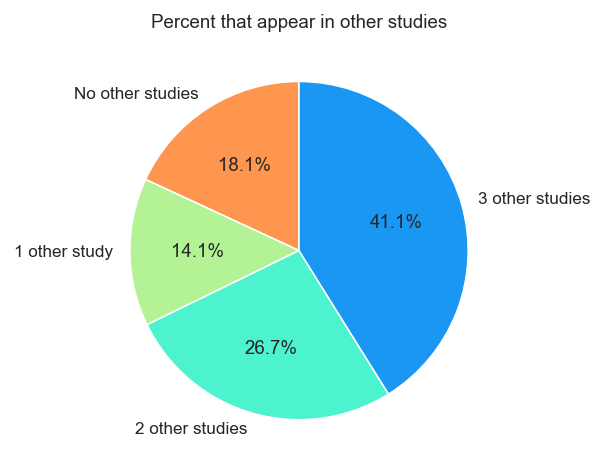

In [10]:
import matplotlib.pyplot as plt

structure_comparison = lan.get_data('ss').as_interactions(
    structure2=[
        manfredonia.get_data('ss'),
        huston.get_data('ss'),
        sun.get_data('ss')
        ]
    )
df = structure_comparison.data
percentages = [sum(df["Num_structures"] == i)*(i+1) / len(df)
               for i in [0, 1, 2, 3]]
plt.pie(
    x=percentages,
    labels=["No other studies", "1 other study", "2 other studies", "3 other studies"],
    colors=structure_comparison._metric["cmap"],
    startangle=90,
    autopct='%1.1f%%')
plt.title("Percent that appear in other studies")

# plt.savefig("pie_chart.svg")


## Visualize structure models

To visualize these structure models, we employ `rnav.plot_arcs()` to display arc plots with each base-pair represented as an arc and colored by how many models predict it.
To limit the size of these plots, we only visualize nucleotides 1-3000 and 3001-6000 using the `region` argument. 

One parameter that has an impact on predicted structures is the maximum primary sequence distance between base pairs.
This parameter is provided to the folding algorithm and was chosen heuristically by each group, each landing on a different value.
These limits are added to this plot using the Matplotlib interface of the RNAvigate plot.
Each dashed line represents the maximum height of an arc reported by one of the studies.

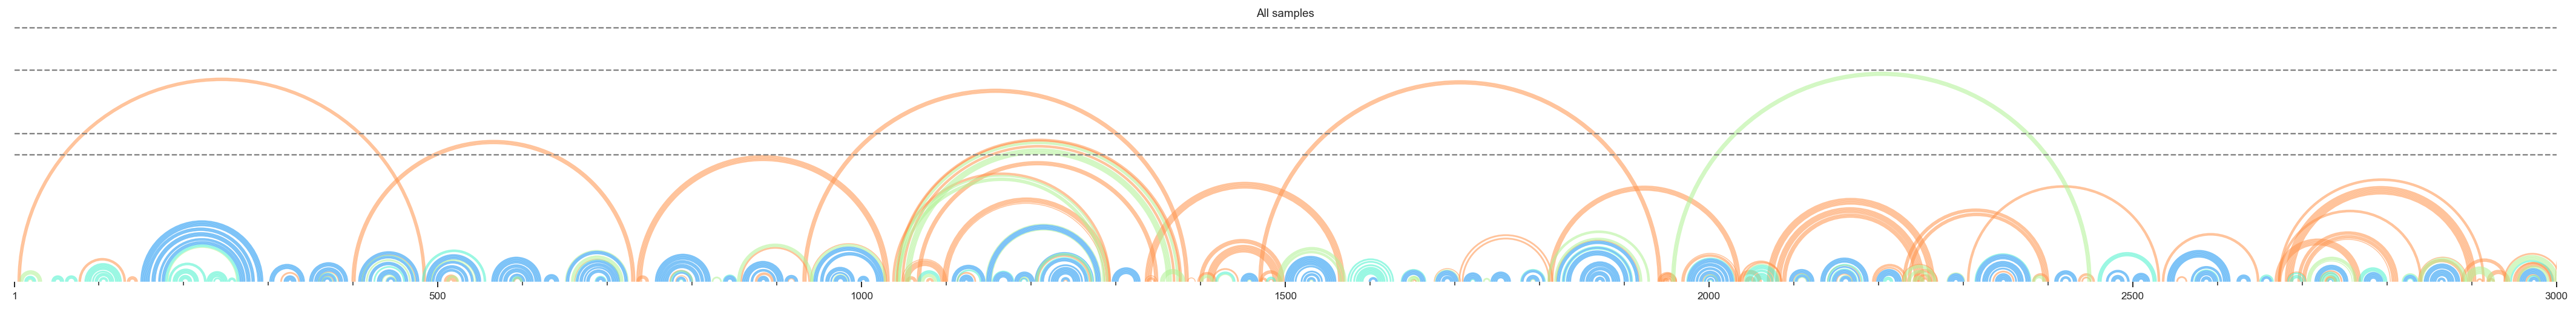

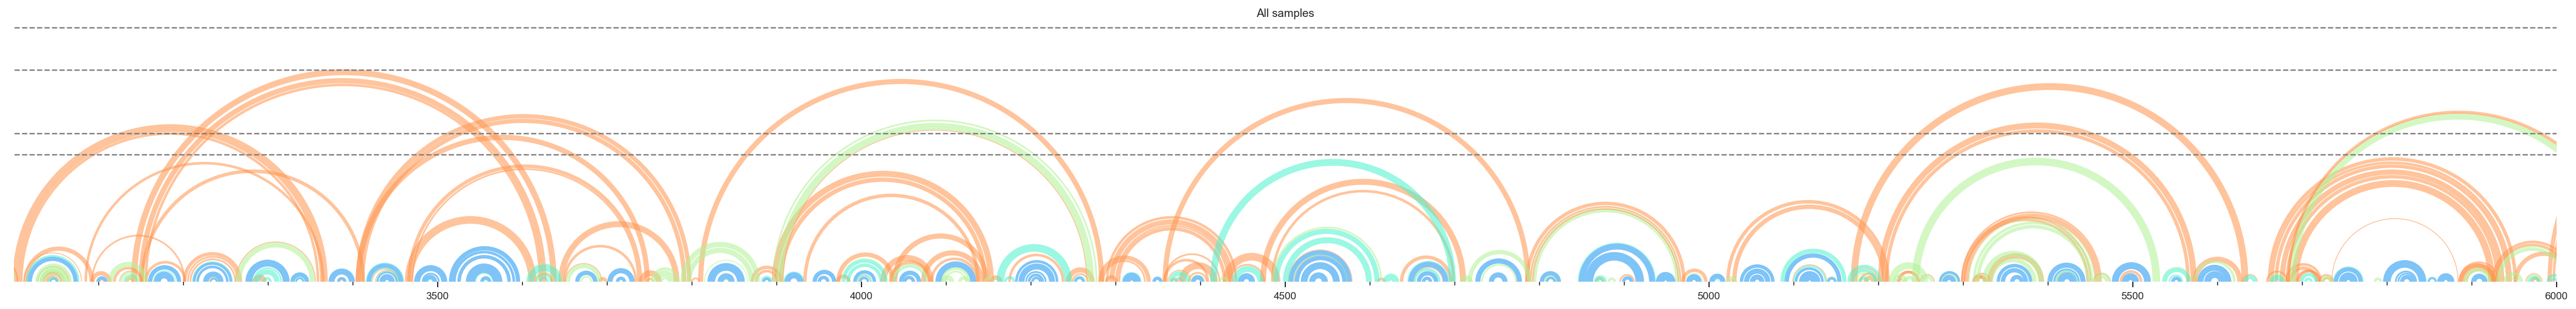

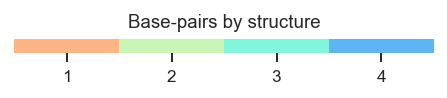

In [11]:
for start, end in [[1, 3000], [3001, 6000]]:
    plot = rnav.plot_arcs(
        samples=[lan],
        labels=["All samples"],
        sequence=structure_comparison,
        interactions=structure_comparison,
        panels={"interactions": "top"},
        region=[start, end],
        seqbar=False,
        colorbars=False,
        nt_ticks=(500, 100),
        )
    ax = plot.axes[0, 0]
    ax.set(ylim=(0, 305))
    for pairing_distance in [350, 300, 500, 600]:
        ax.plot(
            [start, end], [pairing_distance/2, pairing_distance/2],
            color="grey", ls="--"
            )
    plot.set_figure_size(height_ax_rel=0.01, width_ax_rel=0.01)
    # plot.save(f"ss_compare_{start}_{end}.svg")

cb_plot = plot.plot_colorbars()
# cb_plot.save("ss_compare_colorbar.svg")
